In [99]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.dpi"] = 100
import plotly.graph_objects as go
from scipy.optimize import fsolve
# import warnings
# warnings.filterwarnings("error")
# import pyvista as pv

In [100]:
def F(Y: np.ndarray, K, f, a, b) -> np.ndarray:
    N = (Y.shape[0]) // 2
    X = Y[:N]
    U = Y[N:2*N]
    C = Y[2*N]

    Yr = np.zeros(2*N+1)
    # # fill first equation batch
    # E1 = np.zeros(N-1)
    # E1rhs = 1/(N-1)*sum(map(lambda i: np.sqrt(1+4/(X[i]**2*X[i+1]**2)*(X[i]*(U[i+1]-C)-X[i+1]*(U[i]-C))**2)*(X[i+1]-X[i]), range(0, N-2+1, 1)))
    # for n in range(0, N-2+1, 1):
    #     E1[n] = np.sqrt(1+4/(X[n]**2*X[n+1]**2)*(X[n]*(U[n+1]-C)-X[n+1]*(U[n]-C))**2)*(X[n+1]-X[n]) - E1rhs
    # fill first equation batch
    E1 = np.zeros(N-1)
    E1rhs = 1/(N-1)*sum(map(lambda i: np.sqrt(np.power(U[i+1]-U[i], 2)+C*np.power(X[i+1]-X[i], 2)), range(0, N-2+1, 1)))
    for n in range(0, N-2+1, 1):
        E1[n] = np.sqrt(np.power(U[n+1]-U[n], 2) + C*np.power(X[n+1]-X[n], 2)) - E1rhs
    # fill second equation batch
    E2 = np.zeros(N-2)
    for n in range(1, N-2+1, 1):
        E2[n-1] = ((K(U[n])+K(U[n+1]))/2*(U[n+1]-U[n])/(X[n+1]-X[n])-(K(U[n-1])+K(U[n]))/2*(U[n]-U[n-1])/(X[n]-X[n-1])) / \
            ((X[n+1]+X[n])/2-(X[n]+X[n-1])/2)+f(U[n], X[n])
    # fill boundary values
    E3 = np.array(
        [U[0]-0, U[N-1]-1, X[0]-a, X[N-1]-b]
    )

    # Yr = np.zeros(2*N+1)
    # Yr[:N-1] = E1
    # Yr[N-1:N-1+N-2] = E2
    # Yr[N-1+N-2:] = E3

    return np.concatenate((E1, E2, E3))

In [121]:
T = 1

l = 1

a = 0
b = 1

# h = 0.01
# tau = 0.005

N = 100

# M = int(T/tau) + 1
# N = int((b-a)/h) + 1

# X = np.linspace(a, b, N)
X = np.arange(a, b+0.01, 1/99)
# U = np.random.rand(N)
U = np.linspace(a, b, N)
# U = np.zeros((M, N))

# Kuxt = lambda u, x, t: u**2
# K = lambda m, n: Kuxt(U[m][n], n*h, m*tau)
K = lambda u: u
f = lambda u, x: 1#np.sin(x)

# for n in range(N):
#     U[0][n] = 0
    # U[0][n] = -40*((n*h)-0.5)**2+10
    # U[0][n] = 10*np.sin(10*n*h)

C = 1
# for m in range(1, M):
    
Y = np.concatenate((X, U, [C]))
Yr = fsolve(F, Y, args=(K, f, a, b))
X = Yr[:N]
U = Yr[N:2*N]
C = Yr[2*N]

C:\Users\rouol\AppData\Local\Temp\ipykernel_19296\3995649517.py:15: RuntimeWarning: invalid value encountered in sqrt
  E1rhs = 1/(N-1)*sum(map(lambda i: np.sqrt(np.power(U[i+1]-U[i], 2)+C*np.power(X[i+1]-X[i], 2)), range(0, N-2+1, 1)))
C:\Users\rouol\AppData\Local\Temp\ipykernel_19296\3995649517.py:17: RuntimeWarning: invalid value encountered in sqrt
  E1[n] = np.sqrt(np.power(U[n+1]-U[n], 2) + C*np.power(X[n+1]-X[n], 2)) - E1rhs
c:\Users\rouol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [126]:
# np.linspace(a, b, N), np.zeros(N), 1
# max(F(np.concatenate((np.arange(a, b+0.01, 1/99), np.zeros(N), [1])), K, f, a, b))
max(F(np.concatenate((X, U, [C])), K, f, a, b))

1.1111557549335862

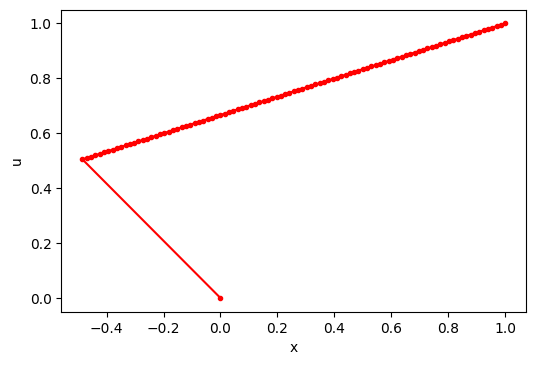

In [123]:
# UX[N:2*N]
# plt.scatter(x=UX[N:2*N], y=UX[:N], s=2)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(X, U, '.r-')
# plt.xlim(0, 1)
# plt.ylim(-0.5, 0.5)
# ax.set_aspect('equal', adjustable='box')

plt.xlabel("x")
plt.ylabel("u")

plt.show()